In [125]:
import pandas as pd 
import numpy as np 

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 


In [126]:
df  = pd.read_csv("VIC.csv")
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '8/3/2020 10:57'),
  Text(0.0, 0, '10/17/2018 9:39'),
  Text(20000.0, 0, '4/1/2019 10:33'),
  Text(40000.0, 0, '9/18/2019 10:13'),
  Text(60000.0, 0, '3/5/2020 9:45'),
  Text(80000.0, 0, '7/24/2020 10:49'),
  Text(100000.0, 0, '12/14/2020 13:43'),
  Text(120000.0, 0, '')])

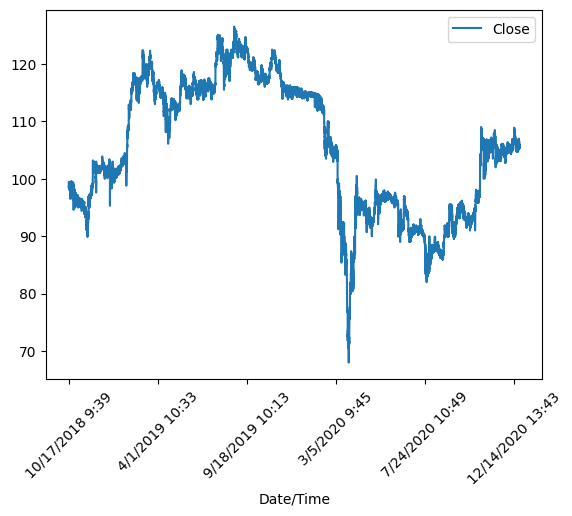

In [127]:
df.plot(x='Date/Time',y="Close")
plt.xticks(rotation=45)

In [128]:
model = RandomForestRegressor()

X = df[['Open','High','Low','Volume']]
X

,Open,High,Low,Volume
0,98.5,98.5,98.5,390
1,98.5,98.5,98.5,760
2,98.6,98.6,98.6,2060
3,98.6,98.6,98.6,5540
4,98.6,98.7,98.6,760
...,...,...,...,...
101261,105.8,105.8,105.7,1870
101262,105.7,105.7,105.7,2510
101263,105.7,105.7,105.7,3620
101264,105.7,105.7,105.7,100


In [129]:
X = X[:int(len(df)-1)]
y = df["Close"]
y = y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [130]:
predictions = model.predict(X)
model.score(X,y)


0.9999919779448532

In [131]:
new_data = pd.DataFrame({
    
    
    'Open': [106],
    'High': [106],
    'Low': [105.9],
    
    'Volume':[360]
    
})

In [133]:
df = pd.concat([df, new_data], ignore_index=True)
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0.0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0.0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0.0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0.0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0.0
...,...,...,...,...,...,...,...,...
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0.0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0.0
101265,VIC,12/22/2020 14:46,105.7,105.7,105.7,105.7,90,0.0
101266,NaN,NaN,106.0,106.0,105.9,NaN,360,NaN


In [134]:
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print("The model predicts the last row or day to be",prediction)
#print("Actual value is",df[['Close']].tail(1).values[0][0])


The model predicts the last row or day to be [105.9]
Actual value is nan
